In [1]:
import numpy as np
import pandas as pd

In [55]:
amazon=pd.read_csv(r"C:/Users/MMT/Pictures/Test/Test/assets/Delete/Ecommerce Purchases/Ecommerce Purchases")

In [63]:
amazon.sample(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
5959,"520 Vincent Rest Suite 772\nEast Omar, IN 19229",70 IS,AM,Opera/8.80.(X11; Linux x86_64; it-IT) Presto/2...,"Warren, Stanton and Holland",3096227353442807,10/16,934,VISA 16 digit,greyes@davis.com,Statistician,123.86.249.77,el,89.58
7930,"PSC 2207, Box 2898\nAPO AP 59220",74 yC,PM,Opera/9.82.(Windows 98; en-US) Presto/2.9.175 ...,Wallace PLC,675948280382,01/25,247,Diners Club / Carte Blanche,phaynes@calderon-williams.com,Immunologist,117.160.81.8,es,37.99
5957,"158 Michelle Brooks\nWest Anthonyhaven, FL 78327",61 Sk,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Caldwell-Gomez,3337103673782009,03/22,448,VISA 16 digit,ojohnson@jones.com,Pathologist,220.181.48.170,de,53.64


In [53]:
amazon.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [54]:
amazon.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [49]:
# highest and lowest purchase price
amazon.sample(3)
print("Highest : ",amazon['Purchase Price'].sort_values().iloc[-1])
amazon['Purchase Price'].min()

Highest :  99.99


0.0

In [50]:
amazon['Purchase Price'].mean().round(2)

50.35

In [51]:
amazon.sample(3)
mask1=amazon['Language']=='fr'
amazon[mask1].count()

Address             1097
Lot                 1097
AM or PM            1097
Browser Info        1097
Company             1097
Credit Card         1097
CC Exp Date         1097
CC Security Code    1097
CC Provider         1097
Email               1097
Job                 1097
IP Address          1097
Language            1097
Purchase Price      1097
dtype: int64

In [40]:
len(amazon[mask1])

1097

In [65]:
# Engineers
amazon.sample(3)
mask=amazon['Job'].str.contains('engineer',case=False)
len(amazon[mask])

984

In [69]:
amazon.sample(3)
# email with IP address 132.207.160.22
print(amazon[amazon['IP Address']=='132.207.160.22']['Email'])
amazon[amazon['IP Address']=='132.207.160.22']

2    amymiller@morales-harrison.com
Name: Email, dtype: object


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [75]:
# Card as mastercard and purchase above 50
amazon.sample(3)
mask1=amazon['CC Provider']=='Mastercard'
mask2=amazon['Purchase Price']>=50.0
len(amazon[mask1&mask2])

405

<Axes: ylabel='count'>

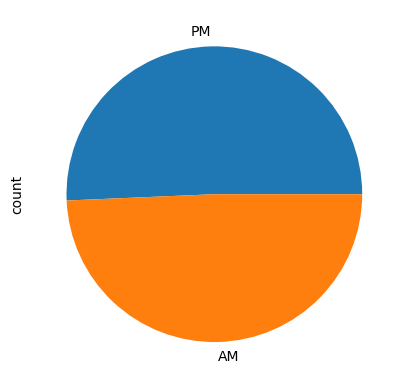

In [80]:
amazon.sample(3)
# Purchase in day vs Night
amazon.value_counts('AM or PM').plot(kind='pie')

In [121]:
# Credit Cards expiring in 2020
amazon['CC Exp Date'].str.split('/').apply(lambda x:x[1]=='20').sum()
#mask1=movies['genres'].str.split('|').apply(lambda x:'Action' in x)

988

In [107]:
def date_check():
    count=0
    for date in amazon['CC Exp Date']:
        if date.split('/')[1]=='20':
            count=count+1
    print(count)

In [108]:
date_check()

988


In [128]:
# Top5 most popular email providers
amazon.sample(3)
amazon['Email Providers']=amazon['Email'].str.split('@').apply(lambda x:x[1])

In [133]:
amazon.value_counts('Email Providers').head()

Email Providers
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64